In [1]:
from model import *
from utils import *
from sklearn.covariance import graphical_lasso
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
N = 10
n = 100
ds = np.linspace(0.1, 0.9, 3)
reg_params = np.linspace(0., 1., 100)
S_obs = 100
S_sg = 10
metric_columns = ['tn', 'fp', 'fn', 'tp', 'fdr', 'fomr', 'tpr', 'tnr', 'ba', 'f1', 'mcc', 'n_model', 'n_data', 'd', 'lambda']
M = N * (N - 1) / 2

In [ ]:
exp_data = []

for d in ds:
    for reg_param in tqdm(reg_params):
        for n_model in range(S_sg):
            model = VectorGraphicalModel(N, d)
    
            for n_data in range(S_obs):
                data = model.rvs(n)
                
                emp_cov = np.cov(data, rowvar=False)
                pred_precision = graphical_lasso(emp_cov, alpha=reg_param)[1]
                
                true_edges = matrix2Edges(model.precision)
                pred_edges = matrix2Edges(pred_precision)
            
                metrics = evaluate(true_edges, pred_edges)
                metrics.extend([n_model, n_data, d, reg_param])
            
                exp_data.append(metrics)
    
exp_data = pd.DataFrame(exp_data, columns=metric_columns)
exp_data

In [4]:
def drawCompleteMetrics(df, axes, clouds=True, label=None, x_axis='lambda'):
    gb_df = df.groupby(x_axis)
    agg_df = gb_df.mean()
    q25_df = gb_df.quantile(0.25)
    q75_df = gb_df.quantile(0.75)
    eps = agg_df.index
    
    axes[0, 0].plot(eps, agg_df['tnr'], label=label)
    axes[0, 0].fill_between(eps, q25_df['tnr'], q75_df['tnr'], alpha=0.2)
    axes[0, 0].set_title('TNR')
    axes[0, 0].set_ylim(-0.01, 1.01)
    
    axes[0, 1].plot(eps, agg_df['fomr'], label=label)
    axes[0, 1].fill_between(eps, q25_df['fomr'], q75_df['fomr'], alpha=0.2)
    axes[0, 1].set_title('FOR')
    axes[0, 1].set_ylim(-0.01, 1.01)
    
    axes[1, 0].plot(eps, agg_df['fdr'], label=label)
    axes[1, 0].fill_between(eps, q25_df['fdr'], q75_df['fdr'], alpha=0.2)
    axes[1, 0].set_title('FDR')
    axes[1, 0].set_ylim(-0.01, 1.01)
    
    axes[1, 1].plot(eps, agg_df['tpr'], label=label)
    axes[1, 1].fill_between(eps, q25_df['tpr'], q75_df['tpr'], alpha=0.2)
    axes[1, 1].set_title('TPR')
    axes[1, 1].set_ylim(-0.01, 1.01)

def drawGeneralMetrics(df, axes, clouds=True, label=None, x_axis='lambda'):
    gb_df = df.groupby(x_axis)
    agg_df = gb_df.mean()
    q25_df = gb_df.quantile(0.25)
    q75_df = gb_df.quantile(0.75)
    eps = agg_df.index
    
    axes[0].plot(eps, agg_df['ba'], label=label)
    axes[0].fill_between(eps, q25_df['ba'], q75_df['ba'], alpha=0.2)
    axes[0].set_title('BA')
    axes[0].set_ylim(-0.01, 1.01)
    
    axes[1].plot(eps, agg_df['f1'], label=label)
    axes[1].fill_between(eps, q25_df['f1'], q75_df['f1'], alpha=0.2)
    axes[1].set_title('F1')
    axes[1].set_ylim(-0.01, 1.01)
    
    axes[2].plot(eps, agg_df['mcc'], label=label)
    axes[2].fill_between(eps, q25_df['mcc'], q75_df['mcc'], alpha=0.2)
    axes[2].set_title('MCC')
    axes[2].set_ylim(-0.01, 1.01)

In [ ]:
exp_data = pd.read_csv('/home/ikostylev/projects/tensorModels/data/aggregated/metricsLambda_N20_n100.csv')
exp_data

Text(0.5, 1.0, 'N = 10; n = 100')

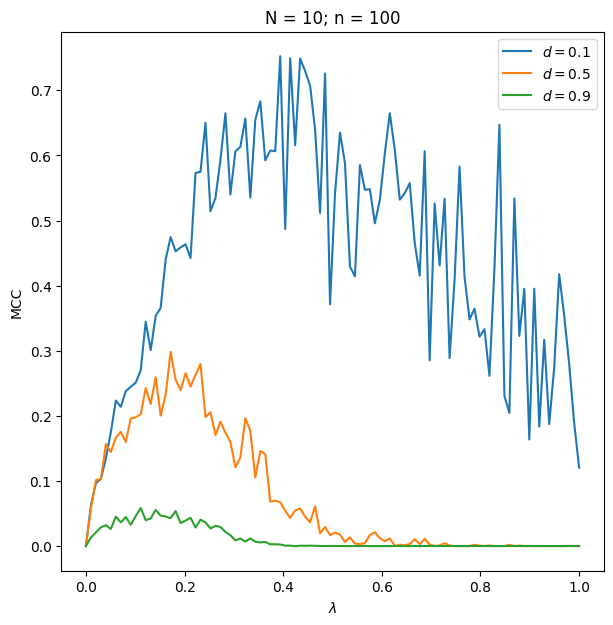

In [28]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 7)

for d in exp_data['d'].unique():
    mean_df = exp_data[exp_data['d'] == d].groupby('lambda').mean()
    
    ax.plot(mean_df.index, mean_df['mcc'], label=f'$d={d}$')

ax.set_xlabel('$\\lambda$')
ax.set_ylabel('MCC')
ax.legend()
ax.set_title(f'N = {N}; n = {n}')
#ax.set_yscale('log')

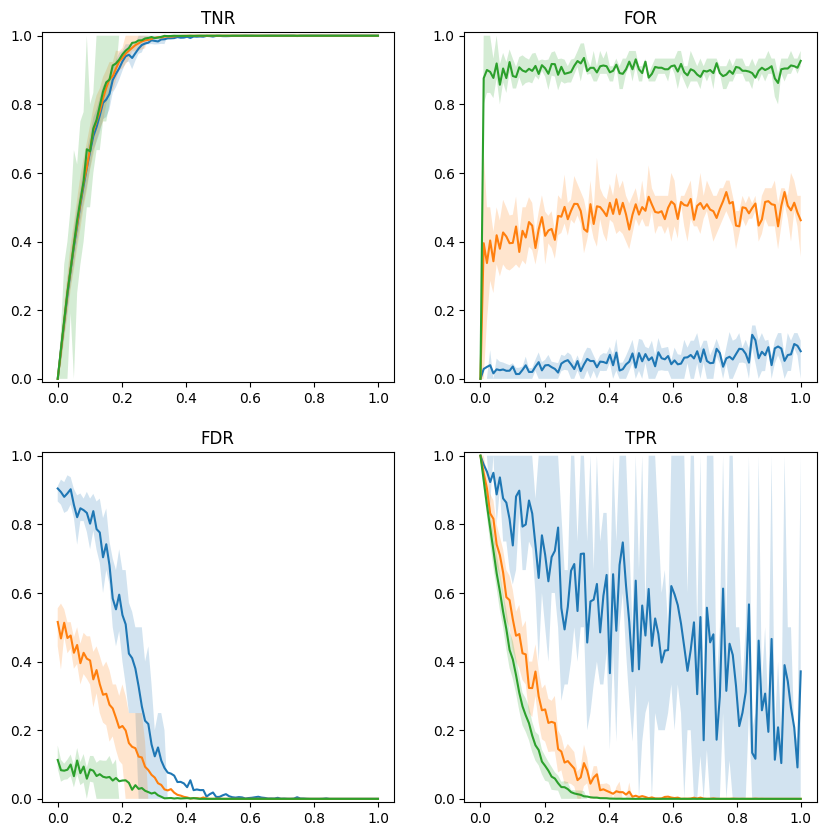

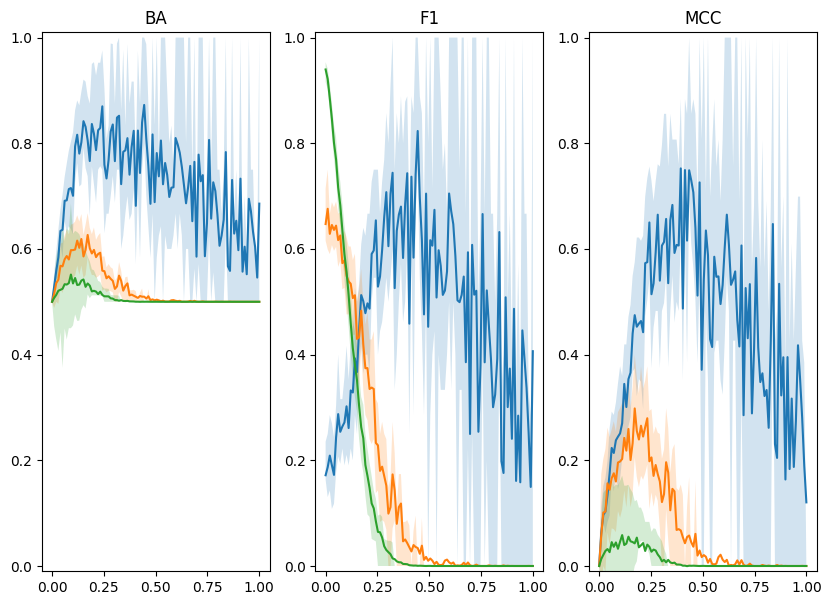

In [33]:
fig, axes = plt.subplots(2, 2)

for d in exp_data['d'].unique():
    df = exp_data[exp_data['d'] == d]

    drawCompleteMetrics(df, axes)
    
fig.set_size_inches(10, 10)

fig, axes = plt.subplots(1, 3)

for d in exp_data['d'].unique():
    df = exp_data[exp_data['d'] == d]

    drawGeneralMetrics(df, axes)
    
fig.set_size_inches(10, 7)
#ax.set_yscale('log')